In [1]:
import galsim 
import batsim
import numpy as np
import matplotlib.pyplot as plt

from time import time

print(batsim._gsinterface.version())

2.5.2


In [4]:
# load in COSMOS catalog
cosmos_cat = galsim.COSMOSCatalog()

# create a galaxy
rng = galsim.BaseDeviate(10000)
gal = cosmos_cat.makeGalaxy(n_random=1, rng=rng, gal_type='parametric')

# get simulation pixel scale and number
# scale = gal.nyquist_scale
# nn = gal.getGoodImageSize(scale)
# print("Sim scale: ", scale)
# print("Sim nn: ", nn)

start = time()
# img = galsim.Image(nn,nn, scale=scale)
# img = gal.drawReal(img)
galimg = gal.drawImage(method='sb')
print("GalSim drawImage: ", time()-start, 'seconds')
print('Tot flux',np.sum(galimg.array))
plt.imshow(galimg.array)

KeyboardInterrupt: 

Batsim sample_galaxy:  6.965322971343994 seconds
Tot flux 19095154.359987758


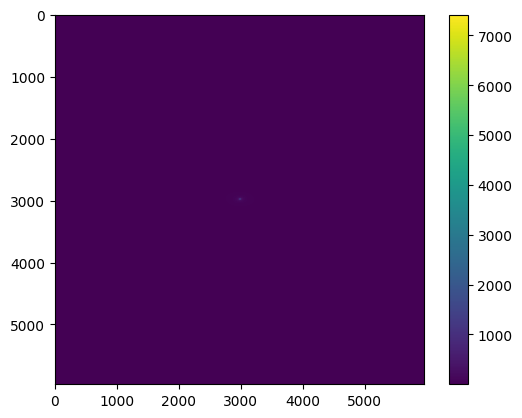

In [51]:
stamp = batsim.Stamp(nn=nn, scale=scale, centering=[0.5*scale,0.5*scale])
start = time()
batarr = stamp.sample_galaxy(gal)
print("Batsim sample_galaxy: ", time()-start, 'seconds')
print('Tot flux',np.sum(batarr))
plt.imshow(batarr)
plt.colorbar()

In [45]:
batimg = galsim.Image(batarr, scale=scale)
batobj = galsim.InterpolatedImage(batimg, scale=scale, normalization='sb')

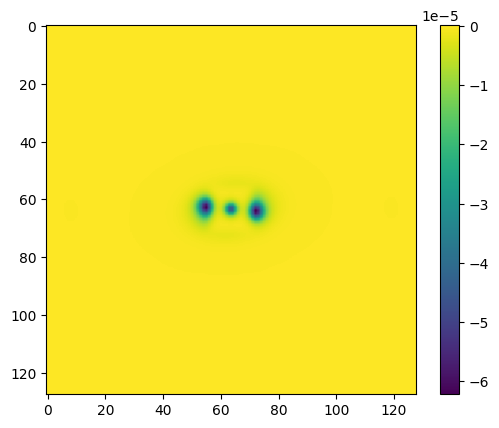

In [46]:
psf = galsim.Moffat(beta=3.5, fwhm=0.6, flux=1.0)
batpsf = galsim.Convolve([psf, batobj])
galpsf = galsim.Convolve([psf, gal])

batpsfimg = batpsf.drawImage(nx=128, ny=128, scale=0.2, method='auto')
galpsfimg = galpsf.drawImage(nx=128, ny=128, scale=0.2, method='auto')

plt.imshow(batpsfimg.array-galpsfimg.array)
plt.colorbar()